# Data Preprocessing with Pandas

## Import Modules

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Import data

Data is generated from [Australia Bureau of statistics](http://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/6416.0Mar%202015?OpenDocument), some cells are removed (set to NaN) manually in order to serve this notebook.

In [19]:
df = pd.read_csv('./asset/Median Price of Established House Transfers.txt', sep='\t') # row 3 has a null value
df.head()

,City,Quarter,Price
0,Sydney,Q1,700.0
1,Rest of NSW,Q1,370.0
2,Melbourne,Q1,525.0
3,Rest of Vic.,Q1,NaN
4,Brisbane,Q1,460.0


## Finding and Handling Missing Data

In [20]:
# find rows that Price is null
df[pd.isnull(df['Price'])]

,City,Quarter,Price
3,Rest of Vic.,Q1,NaN
13,Rest of NT,Q1,NaN
21,Adelaide,Q2,NaN
27,Darwin,Q2,NaN
40,Hobart,Q3,NaN
49,Brisbane,Q4,NaN


In [21]:
index_with_null = df[pd.isnull(df['Price'])].index
index_with_null

Int64Index([3, 13, 21, 27, 40, 49], dtype='int64')

We can specify a value (e.g., 0) to replace those null values, through the fillna() method

In [22]:
df2 = df.fillna(0) # price value of row 3 is set to 0.0
df2.ix[index_with_null]
# df2.index in index_with_null

,City,Quarter,Price
3,Rest of Vic.,Q1,0.0
13,Rest of NT,Q1,0.0
21,Adelaide,Q2,0.0
27,Darwin,Q2,0.0
40,Hobart,Q3,0.0
49,Brisbane,Q4,0.0


We can also propagate non-null values forward or backward

In [23]:
df2 = df.fillna(method='pad', axis=0)
df2.head() # The price of row 3 is the same as that of row 2

,City,Quarter,Price
0,Sydney,Q1,700.0
1,Rest of NSW,Q1,370.0
2,Melbourne,Q1,525.0
3,Rest of Vic.,Q1,525.0
4,Brisbane,Q1,460.0


We can even drop the rows (or columns) with null values

In [24]:
df2 = df.dropna(axis=0) # if axis = 1 then the column will be dropped
df2.head() # Note that row 3 is dropped

,City,Quarter,Price
0,Sydney,Q1,700.0
1,Rest of NSW,Q1,370.0
2,Melbourne,Q1,525.0
4,Brisbane,Q1,460.0
5,Rest of Qld.,Q1,400.0


Obviously, none of the above solutions are appropriate.

A better way to deal with the null value is to replace them with the mean value of the prices of the corresponding city over the whole year.

In [25]:
df["Price"] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))
df.ix[index_with_null]

,City,Quarter,Price
3,Rest of Vic.,Q1,294.666667
13,Rest of NT,Q1,422.500000
21,Adelaide,Q2,420.433333
27,Darwin,Q2,579.166667
40,Hobart,Q3,359.000000
49,Brisbane,Q4,468.633333


## Binning

### Equal-width Partitioning

We use the table with all null values filled

In [26]:
pd.cut(df['Price'],5).head() # equally partition Price into 5 bins

0        (597, 716]
1        (359, 478]
2        (478, 597]
3    (239.405, 359]
4        (359, 478]
Name: Price, dtype: category
Categories (5, object): [(239.405, 359] < (359, 478] < (478, 597] < (597, 716] < (716, 835]]

In [27]:
# We could label the bins and add new column
df['Bin'] = pd.cut(df['Price'],5,labels=["Very Low","Low","Medium","High","Very High"])
df.head()

,City,Quarter,Price,Bin
0,Sydney,Q1,700.000000,High
1,Rest of NSW,Q1,370.000000,Low
2,Melbourne,Q1,525.000000,Medium
3,Rest of Vic.,Q1,294.666667,Very Low
4,Brisbane,Q1,460.000000,Low


### Equal-depth Partitioining

In [28]:
pd.qcut(df['Price'],5).head() # Note the difference from the Equal-width Partitioning case

0      (555.1, 835]
1      (336.4, 395]
2    (440.5, 555.1]
3      [240, 336.4]
4    (440.5, 555.1]
Name: Price, dtype: category
Categories (5, object): [[240, 336.4] < (336.4, 395] < (395, 440.5] < (440.5, 555.1] < (555.1, 835]]

In [29]:
# Let's check the depth of each bin
df['Bin'] = pd.qcut(df['Price'],5,labels=["Very Low","Low","Medium","High","Very High"])
df.groupby('Bin').size()

Bin
Very Low     12
Low          12
Medium       12
High         12
Very High    12
dtype: int64

## Smoothing

### Smoothing by Bin Means

In [30]:
df.head()

,City,Quarter,Price,Bin
0,Sydney,Q1,700.000000,Very High
1,Rest of NSW,Q1,370.000000,Low
2,Melbourne,Q1,525.000000,High
3,Rest of Vic.,Q1,294.666667,Very Low
4,Brisbane,Q1,460.000000,High


In [31]:
df['Price-Smoothing-mean'] = df.groupby('Bin')['Price'].transform('mean')
df.head()

,City,Quarter,Price,Bin,Price-Smoothing-mean
0,Sydney,Q1,700.000000,Very High,634.763889
1,Rest of NSW,Q1,370.000000,Low,372.416667
2,Melbourne,Q1,525.000000,High,519.961111
3,Rest of Vic.,Q1,294.666667,Very Low,270.805556
4,Brisbane,Q1,460.000000,High,519.961111


### Smoothing by Bin Max

In [32]:
df['Price-Smoothing-max'] = df.groupby('Bin')['Price'].transform('max')
df.head()

,City,Quarter,Price,Bin,Price-Smoothing-mean,Price-Smoothing-max
0,Sydney,Q1,700.000000,Very High,634.763889,835.0
1,Rest of NSW,Q1,370.000000,Low,372.416667,387.5
2,Melbourne,Q1,525.000000,High,519.961111,555.0
3,Rest of Vic.,Q1,294.666667,Very Low,270.805556,302.0
4,Brisbane,Q1,460.000000,High,519.961111,555.0


## Normalization

In [33]:
df = pd.read_csv('./asset/Median Price of Established House.txt', sep='\t')
df.head()

,City,Q1,Q2,Q3,Q4
0,Sydney,700.0,750.0,750.0,835.0
1,Rest of NSW,370.0,375.0,373.0,385.0
2,Melbourne,525.0,555.5,540.0,580.0
3,Rest of Vic.,300.0,295.0,287.0,302.0
4,Brisbane,460.0,474.9,471.0,485.0


### Standard Scaler

In [34]:
from sklearn import preprocessing

min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(df[df.columns[1:5]]) # we need to remove the first column


df_standard = pd.DataFrame(x_scaled)
df_standard.insert(0, 'City', df.City)
df_standard

,City,0,1,2,3
0,Sydney,2.150188,2.360452,2.379522,2.611997
1,Rest of NSW,-0.544010,-0.477782,-0.506402,-0.488501
2,Melbourne,0.721446,0.888355,0.771978,0.855048
3,Rest of Vic.,-1.115507,-1.083272,-1.164729,-1.060370
4,Brisbane,0.190771,0.278324,0.243785,0.200499
5,Rest of Qld.,-0.299083,-0.250723,-0.299718,-0.309361
6,Adelaide,-0.176620,-0.212880,-0.155804,-0.195676
7,Rest of SA,-1.401255,-1.340605,-1.409688,-1.246400
8,Perth,0.925552,0.771041,0.848528,0.682798
9,Rest of WA,-0.401136,-0.462645,-0.452817,-0.485056


## Robust Scaler

In [35]:
from sklearn import preprocessing

min_max_scaler = preprocessing.RobustScaler()
x_scaled = min_max_scaler.fit_transform(df[df.columns[1:5]]) # we need to remove the first column

df_robust = pd.DataFrame(x_scaled)
df_robust.insert(0, 'City', df.City)
df_robust

,City,0,1,2,3
0,Sydney,1.686391,1.837838,1.804905,2.213333
1,Rest of NSW,-0.266272,-0.189189,-0.249591,-0.186667
2,Melbourne,0.650888,0.786486,0.660490,0.853333
3,Rest of Vic.,-0.680473,-0.621622,-0.718256,-0.629333
4,Brisbane,0.266272,0.350811,0.284469,0.346667
5,Rest of Qld.,-0.088757,-0.027027,-0.102452,-0.048000
6,Adelaide,0.000000,0.000000,0.000000,0.040000
7,Rest of SA,-0.887574,-0.805405,-0.892643,-0.773333
8,Perth,0.798817,0.702703,0.714986,0.720000
9,Rest of WA,-0.162722,-0.178378,-0.211444,-0.184000


## Histograms

In [36]:
df = pd.read_csv('./asset/Median Price of Established House.txt', sep='\t')
df.head()

,City,Q1,Q2,Q3,Q4
0,Sydney,700.0,750.0,750.0,835.0
1,Rest of NSW,370.0,375.0,373.0,385.0
2,Melbourne,525.0,555.5,540.0,580.0
3,Rest of Vic.,300.0,295.0,287.0,302.0
4,Brisbane,460.0,474.9,471.0,485.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11473b358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11479b668>]], dtype=object)

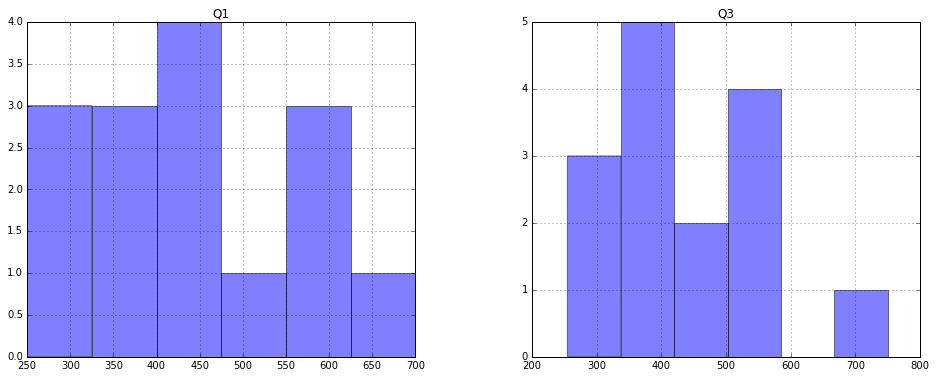

In [37]:
# use bins=x to control the number of bins
df.hist(column=['Q1','Q3'],bins=6,alpha=0.5,figsize=(16, 6))

## Scatter

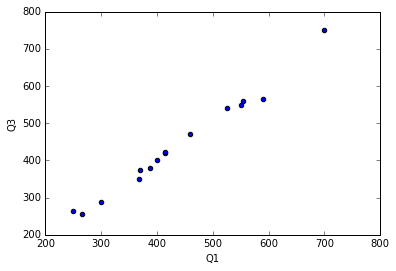

In [38]:
df.plot.scatter(x='Q1', y='Q3');

Scatter matrix provide a better way to discover the relationships in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116e70f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1182e8c88>]], dtype=object)

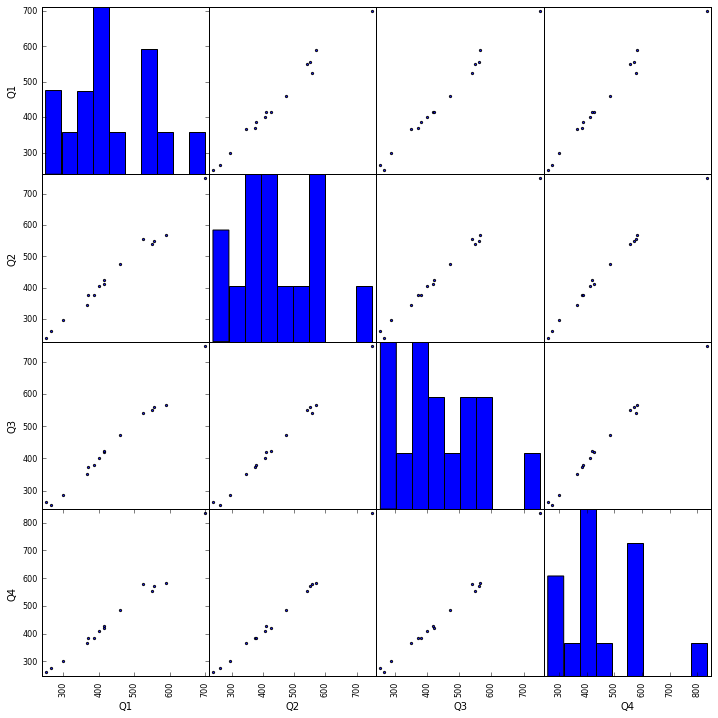

In [39]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, alpha=0.9, figsize=(12, 12), diagonal='hist') # set the diagonal figures to be histograms

## Further reading

* https://blog.modeanalytics.com/python-data-cleaning-libraries/?utm_campaign=Data%2BElixir&utm_medium=email&utm_source=Data_Elixir_94